# Logistic

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
# Given data
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)


In [3]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Linear layer

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply Sigmoid activation


In [4]:
# Model, Loss function, and Optimizer
model = LogisticRegression()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 31.2740
Epoch [200/1000], Loss: 31.6750
Epoch [300/1000], Loss: 32.0606
Epoch [400/1000], Loss: 32.4321
Epoch [500/1000], Loss: 32.7907
Epoch [600/1000], Loss: 33.1373
Epoch [700/1000], Loss: 33.4729
Epoch [800/1000], Loss: 33.7981
Epoch [900/1000], Loss: 34.1137
Epoch [1000/1000], Loss: 34.4202


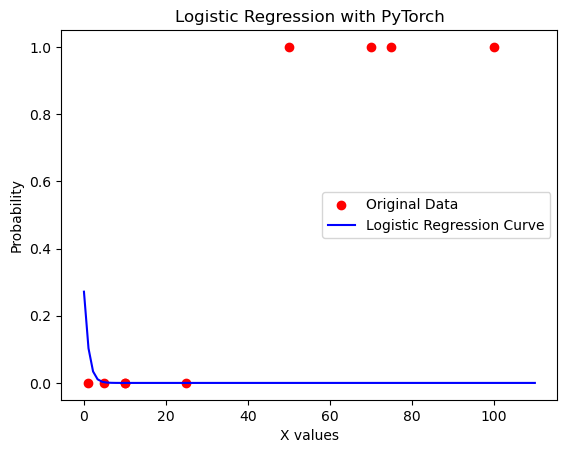

In [5]:
# Plot Data and Decision Boundary
x_test = torch.linspace(0, 110, 100).view(-1, 1)  # Test range
y_test = model(x_test).detach()  # Get predictions

plt.scatter(x, y, color="red", label="Original Data")
plt.plot(x_test, y_test, color="blue", label="Logistic Regression Curve")
plt.xlabel("X values")
plt.ylabel("Probability")
plt.legend()
plt.title("Logistic Regression with PyTorch")
plt.show()


In [6]:
with torch.no_grad():
    test_values = torch.tensor([[15.0], [30.0], [60.0], [90.0]])  # Test inputs
    predictions = model(test_values)
    predictions = (predictions > 0.5).float()  # Convert probabilities to 0 or 1

print(f'Predictions for {test_values.view(-1).tolist()}: {predictions.view(-1).tolist()}')


Predictions for [15.0, 30.0, 60.0, 90.0]: [0.0, 0.0, 0.0, 0.0]
